In [9]:
import pandas as pd
import plotly_express as px


df = pd.read_excel("../Data/Folkhalsomyndigheten_Covid19_Vaccine.xlsx", sheet_name= "Vaccinerade kommun och ålder")
df.head()

,Län,Län_namn,Kommun,Kommun_namn,Ålder,Befolkning,Antal minst 1 dos,Antal minst 2 doser,Antal 3 doser,Antal 4 doser,Andel minst 1 dos,Andel minst 2 doser,Andel 3 doser,Andel 4 doser
0,1,Stockholms län,114,Upplands Väsby,12-15,2422,1206,1046,NaN,NaN,0.497936,0.431874,NaN,NaN
1,1,Stockholms län,114,Upplands Väsby,16-17,1203,836,753,NaN,NaN,0.694929,0.625935,NaN,NaN
2,1,Stockholms län,114,Upplands Väsby,18-29,6692,4883,4464,1957.0,NaN,0.729677,0.667065,0.292439,NaN
3,1,Stockholms län,114,Upplands Väsby,30-39,7332,5550,5249,2881.0,NaN,0.756956,0.715903,0.392935,NaN
4,1,Stockholms län,114,Upplands Väsby,40-49,6946,5587,5425,3720.0,NaN,0.804348,0.781025,0.535560,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Län                  2900 non-null   int64  
 1   Län_namn             2900 non-null   object 
 2   Kommun               2900 non-null   int64  
 3   Kommun_namn          2900 non-null   object 
 4   Ålder                2900 non-null   object 
 5   Befolkning           2900 non-null   int64  
 6   Antal minst 1 dos    2900 non-null   int64  
 7   Antal minst 2 doser  2900 non-null   int64  
 8   Antal 3 doser        2320 non-null   float64
 9   Antal 4 doser        870 non-null    float64
 10  Andel minst 1 dos    2900 non-null   float64
 11  Andel minst 2 doser  2900 non-null   float64
 12  Andel 3 doser        2320 non-null   float64
 13  Andel 4 doser        870 non-null    float64
dtypes: float64(6), int64(5), object(3)
memory usage: 317.3+ KB


## a)
* Using both "Län_namn" and "Län" just to make sure there aren't any typos etc in the dataset. There is a total of 21 regions represented in the dataset. 

In [17]:
län1 = len(df["Län_namn"].drop_duplicates())
län2 = len(df["Län"].drop_duplicates())
print(f"{län1}")
print(f"{län2}")

21
21


## b)
* Same as above, using two columns to make sure that there aren't any typos or stuff like that.
* There are a total of 290 municipalities represented in the dataset.

In [16]:
kommuner1 = len(df["Kommun_namn"].drop_duplicates())
kommuner2 = len(df["Kommun"].drop_duplicates())
print(f"{kommuner1}")
print(f"{kommuner2}")

290
290


## c)
Population: 9092790

In [20]:
befolkning_summerad = sum(df["Befolkning"])
print(f"The population represented in the dataset is: {befolkning_summerad}")

The population represented in the dataset is: 9092790


## d)


In [32]:
df12 = df[(df["Ålder"] == "12-15")]
pop_age_12_15 = sum(df12["Befolkning"])

df16 = df[(df["Ålder"] == "16-17")]
pop_age_16_17 = sum(df16["Befolkning"])

total_under_18 = pop_age_12_15 + pop_age_16_17
print(f"The total population between ages 12-17 represented in this dataset is: {total_under_18}")


The total population between ages 12-17 represented in this dataset is: 745370


* estimated population under 18 vs actual

In [41]:
estimate = total_under_18 / 6 # divide by 6, since there are 6 age groups. 12, 13, 14, 15, 16, 16
estimate
estimate = estimate * 18 # multiply by 18, since there are 18 age groups, 0, 1 ..., 17
estimate
print(f"Based on this dataset there is an estimate of {estimate:.0f} children under 18 in Sweden.")

Based on this dataset there is an estimate of 2236110 children under 18 in Sweden.


By using https://www.statistikdatabasen.scb.se/pxweb/sv/ssd/START__BE__BE0101__BE0101A/BefolkningNy/table/tableViewLayout1/ I can calculate and summerize the actual population in Sweden of age groups 0-17. This dataset shows the population for year 2021 (There's no count for 2022 yet) and age groups 0-17 I get the number to 2198240.

Note: I thought this tool on SCB was kinda cool. I could've downloaded a complete dataset and represented the data after some cleaning too but I wanted to use their website as a test. 

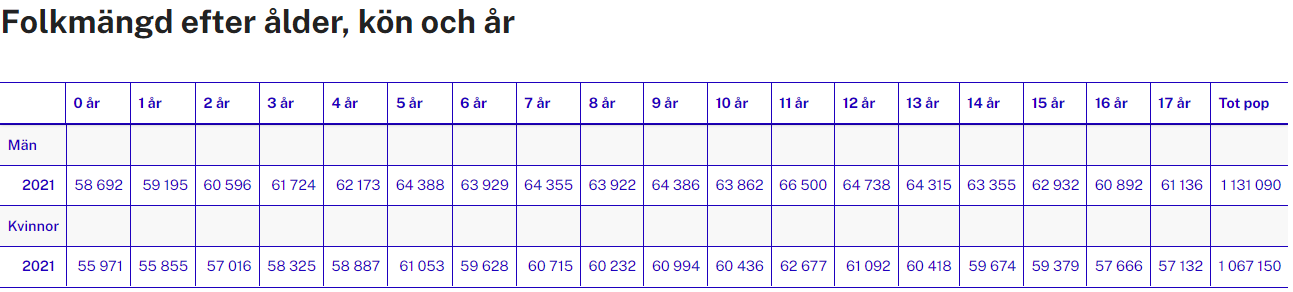

In [46]:
# source on how to show an image : https://mljar.com/blog/jupyter-notebook-insert-image/
from IPython import display
display.Image("../Data/Folkmängd_efter_ålder_kön_och_år.png")

This shows me that there was a ~1.7 % difference between my estimate and the actual value. The estimate was ~1.7 % higher than the actual.

In [50]:
actual = 2198240
diff = (estimate/actual)*100
diff

101.7227418298275

## e)

In [69]:
# was going to use 'px.bar' first, but decided on 'px.histogram'.
# 'px.bar' results in one rectangle drawn per row of iinpit, which can result in a striped look.
# 'px.histogram' combines the rectangles into one per color per position.
# https://plotly.com/python/bar-charts/
fig = px.histogram(
    df,
    x="Ålder",
    y="Befolkning",
    #labels={},
    title="Swedish population ages 12-90+",
    color="Ålder", # using color makes the histogram look nicer
)
fig.show()
fig.write_html("Visualiseringar/swedish_population_ages_12_90.html")

# NOTE: This histogram can be misleading if you'd like a quick overview of the swedish population, since it's missing ages 0-11.


## f)